<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [2]:
!pip install pandas


In [3]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [4]:
#!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"


#### Step 2: Import necessary libraries and load the dataset


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


#### Load the data


In [7]:
df = pd.read_csv(url)


#### Display the first few rows to understand the structure of the data


In [8]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


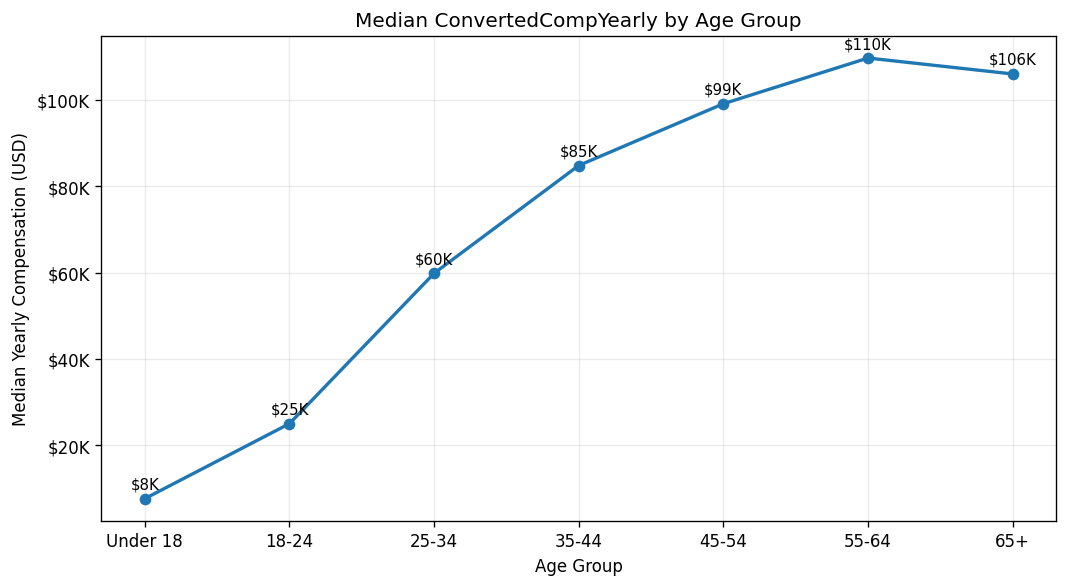

,median_comp,n
AgeGroup,,
Under 18,7626.5,64
18-24,25000.0,3433
25-34,59825.0,10369
35-44,84796.0,6231
45-54,99099.0,2329
55-64,109691.0,863
65+,106000.0,137


In [9]:
## Write your code here
# Lab 23 — Task 1.1
# Line chart: Median ConvertedCompYearly by Age Group

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# --- helpers ---
def pick(cols):
    for c in cols:
        if c in df.columns:
            return c
    return None

def age_group_label(val):
    """Map Age (numbers or ranges like '25-34 years old') to canonical bands."""
    if pd.isna(val): 
        return np.nan
    s = str(val).strip()
    m = re.search(r'(\d+)\s*[-–]\s*(\d+)', s)  # e.g., '25-34'
    if m:
        return f"{int(m.group(1))}-{int(m.group(2))}"
    if re.search(r'under\s*18', s, re.I): 
        return "Under 18"
    if re.search(r'65\s*\+|65\s*years?\s*or\s*older', s, re.I): 
        return "65+"
    m2 = re.search(r'(\d+(?:\.\d+)?)', s.replace(',', ''))
    if not m2:
        return np.nan
    a = float(m2.group(1))
    for lo, hi, lab in [(0,17,"Under 18"),(18,24,"18-24"),(25,34,"25-34"),
                        (35,44,"35-44"),(45,54,"45-54"),(55,64,"55-64"),(65,200,"65+")]:
        if lo <= a <= hi: 
            return lab
    return np.nan

def human_currency(v, _):
    v = 0 if v is None or np.isnan(v) else v
    if v >= 1e9: return f"${v/1e9:.1f}B"
    if v >= 1e6: return f"${v/1e6:.1f}M"
    if v >= 1e3: return f"${v/1e3:.0f}K"
    return f"${v:.0f}"

# --- choose columns & prepare ---
comp_col = pick(["ConvertedCompYearly", "CompTotal", "CompTotalUSD", "Salary"])
if comp_col is None:
    raise ValueError("Could not find a compensation column (e.g., 'ConvertedCompYearly').")

stg = pd.DataFrame({
    "AgeGroup": df["Age"].map(age_group_label),
    "Comp": pd.to_numeric(df[comp_col], errors="coerce")
})

# Keep valid rows: age group present and positive compensation
stg = stg.dropna(subset=["AgeGroup"])
stg = stg[stg["Comp"] > 0]

if stg.empty:
    print("⚠️ No valid rows after cleaning (check Age and ConvertedCompYearly).")
else:
    age_order = ["Under 18","18-24","25-34","35-44","45-54","55-64","65+"]

    med = (stg.groupby("AgeGroup", as_index=False)
              .agg(median_comp=("Comp", "median"),
                   n=("Comp", "size"))
              .set_index("AgeGroup")
              .reindex(age_order))

    med = med.dropna(subset=["median_comp"])  # drop groups with no data after reindex

    # --- plot ---
    fig, ax = plt.subplots(figsize=(9, 5), dpi=120)
    x = np.arange(len(med.index))

    ax.plot(x, med["median_comp"].values, marker="o", linewidth=2)
    # optional tiny labels at each point
    for i, val in enumerate(med["median_comp"].values):
        ax.annotate(human_currency(val, None), (x[i], val),
                    xytext=(0, 6), textcoords="offset points", ha="center", fontsize=9)

    ax.set_xticks(x)
    ax.set_xticklabels(med.index, rotation=0)
    ax.yaxis.set_major_formatter(FuncFormatter(human_currency))
    ax.set_xlabel("Age Group")
    ax.set_ylabel("Median Yearly Compensation (USD)")
    ax.set_title("Median ConvertedCompYearly by Age Group")
    ax.grid(True, alpha=0.25)

    plt.tight_layout()
    plt.show()

    # (optional) peek at the numbers
    display(med)


##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


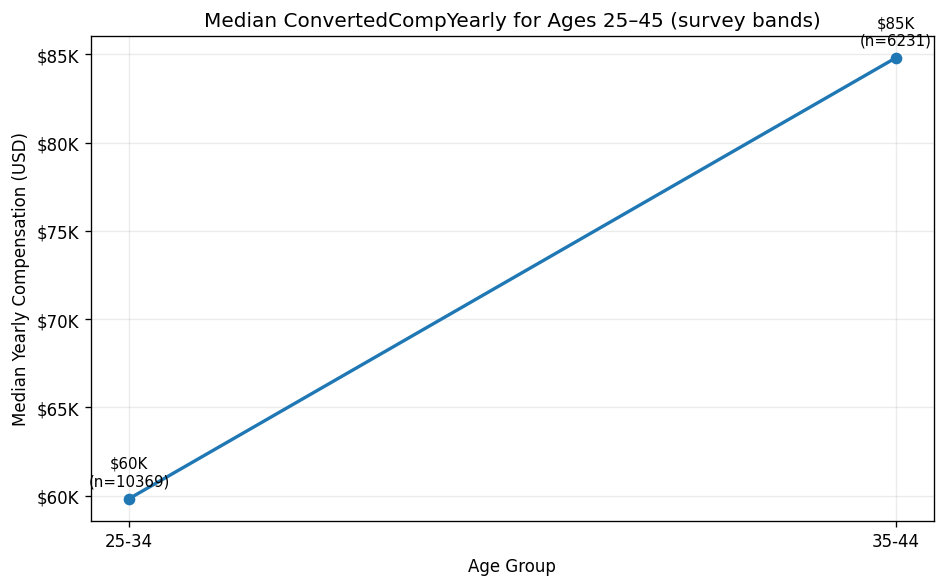

In [10]:
## Write your code here
# %%
# Median compensation for respondents 25–45 using the survey bands
import re, numpy as np, pandas as pd, matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def age_group_label(val):
    if pd.isna(val): return np.nan
    s = str(val).strip()
    m = re.search(r'(\d+)\s*[-–]\s*(\d+)', s)
    if m: return f"{int(m.group(1))}-{int(m.group(2))}"
    if re.search(r'under\s*18', s, re.I): return "Under 18"
    if re.search(r'65\s*\+|65\s*years?\s*or\s*older', s, re.I): return "65+"
    m2 = re.search(r'(\d+(?:\.\d+)?)', s.replace(',', ''))
    if not m2: return np.nan
    a = float(m2.group(1))
    for lo,hi,lab in [(0,17,"Under 18"),(18,24,"18-24"),(25,34,"25-34"),
                      (35,44,"35-44"),(45,54,"45-54"),(55,64,"55-64"),(65,200,"65+")]:
        if lo <= a <= hi: return lab
    return np.nan

def human_currency(v,_):
    if v>=1e9: return f"${v/1e9:.1f}B"
    if v>=1e6: return f"${v/1e6:.1f}M"
    if v>=1e3: return f"${v/1e3:.0f}K"
    return f"${v:.0f}"

comp = pd.to_numeric(df.get("ConvertedCompYearly"), errors="coerce")
ageg = df["Age"].map(age_group_label)

work = pd.DataFrame({"AgeGroup": ageg, "Comp": comp}).dropna(subset=["AgeGroup"])
work = work[(work["AgeGroup"].isin(["25-34","35-44"])) & (work["Comp"]>0)]

med = (work.groupby("AgeGroup", as_index=False)
            .agg(median_comp=("Comp","median"), n=("Comp","size")))
order = ["25-34","35-44"]
med["AgeGroup"] = pd.Categorical(med["AgeGroup"], categories=order, ordered=True)
med = med.sort_values("AgeGroup")

# Plot
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(figsize=(8,5), dpi=120)
x = np.arange(len(med))
y = med["median_comp"].values
ax.plot(x, y, marker="o", linewidth=2)
for i,(val,nn) in enumerate(zip(y, med["n"])):
    ax.annotate(f"{human_currency(val,None)}\n(n={nn})",(x[i],val),
                xytext=(0,8), textcoords="offset points", ha="center", fontsize=9)
ax.set_xticks(x); ax.set_xticklabels(med["AgeGroup"])
ax.yaxis.set_major_formatter(FuncFormatter(human_currency))
ax.set_xlabel("Age Group"); ax.set_ylabel("Median Yearly Compensation (USD)")
ax.set_title("Median ConvertedCompYearly for Ages 25–45 (survey bands)")
ax.grid(True, alpha=0.25)
plt.tight_layout(); plt.show()

### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


c:\Users\liyana_bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]


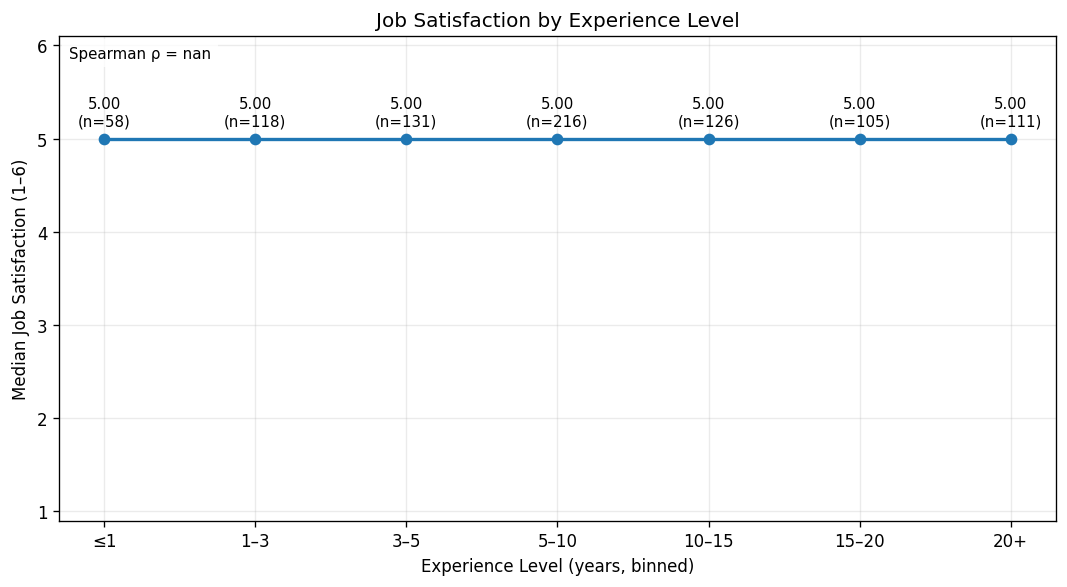

In [11]:
## Write your code here
# Line Chart — Job Satisfaction (JobSatPoints_6) by Experience Level (YearsCodePro/YearsCode)
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- helpers ----------
def find_col(cands):
    for c in cands:
        if c in df.columns:
            return c
    return None

def years_to_numeric(val):
    """Parse YearsCodePro/YearsCode into a float."""
    if pd.isna(val): 
        return np.nan
    if isinstance(val, (int, float)): 
        return float(val)
    s = str(val).strip().lower()
    if "less than 1" in s: 
        return 0.5
    if ("more than" in s and "50" in s) or s == "50+":
        return 50.0
    if s.endswith("+"):
        m = re.search(r'(\d+)', s)
        return float(m.group(1)) if m else np.nan
    m = re.search(r'-?\d+(?:\.\d+)?', s.replace(',', ''))
    return float(m.group(0)) if m else np.nan

# Prefer the numeric 6-point satisfaction if available, otherwise fall back to text
sat_col = find_col(["JobSatPoints_6", "JobSat_6", "JobSatPoints"])
if sat_col is None:
    raise ValueError("Could not find a JobSatPoints_6-like column in df.")

exp_col = find_col(["YearsCodePro", "YearsCode"])
if exp_col is None:
    raise ValueError("Could not find an experience column (YearsCodePro/YearsCode) in df.")

sat = pd.to_numeric(df[sat_col], errors="coerce")  # 1..6 scale
yrs = df[exp_col].map(years_to_numeric)

work = pd.DataFrame({"Years": yrs, "Sat": sat}).dropna()
# Keep valid satisfaction and reasonable experience window
work = work[(work["Sat"].between(1, 6)) & (work["Years"].between(0, 50))]

# ---------- bin experience (edit bins/labels if you’d like different groupings) ----------
bins   = [-0.01, 1, 3, 5, 10, 15, 20, 50]
labels = ["≤1", "1–3", "3–5", "5–10", "10–15", "15–20", "20+"]

work["ExpBin"] = pd.cut(work["Years"], bins=bins, labels=labels, right=True, include_lowest=True)

# Aggregate: median satisfaction + sample size per bin
agg = (work.groupby("ExpBin", observed=True)
            .agg(median_sat=("Sat", "median"),
                 n=("Sat", "size"))
            .reset_index()
            .dropna(subset=["median_sat"]))

# If some bins are empty, they won’t appear; that’s OK and honest to the data.
# Plot
fig, ax = plt.subplots(figsize=(9, 5), dpi=120)
x = np.arange(len(agg))
y = agg["median_sat"].values

ax.plot(x, y, marker="o", linewidth=2)

# annotate values & counts
for i, (val, count) in enumerate(zip(y, agg["n"])):
    ax.annotate(f"{val:.2f}\n(n={count})", (x[i], val),
                xytext=(0, 8), textcoords="offset points", ha="center", fontsize=9)

ax.set_xticks(x)
ax.set_xticklabels(agg["ExpBin"])
ax.set_ylim(0.9, 6.1)
ax.set_yticks(np.arange(1, 7, 1))
ax.set_xlabel("Experience Level (years, binned)")
ax.set_ylabel("Median Job Satisfaction (1–6)")
ax.set_title("Job Satisfaction by Experience Level")
ax.grid(True, alpha=0.25)

# Optional: trend strength (Spearman handles ordinal bins well)
# Map each label to the bin midpoint for correlation
bin_mid = np.array([0.5, 2, 4, 7.5, 12.5, 17.5, 30.0])
mid_map = dict(zip(labels, bin_mid))
rho = pd.Series(agg["ExpBin"]).map(mid_map).corr(agg["median_sat"], method="spearman")
ax.text(0.01, 0.98, f"Spearman ρ = {rho:.2f}", transform=ax.transAxes,
        ha="left", va="top", fontsize=9,
        bbox=dict(facecolor="white", edgecolor="none", alpha=0.8))

plt.tight_layout()
plt.show()


### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


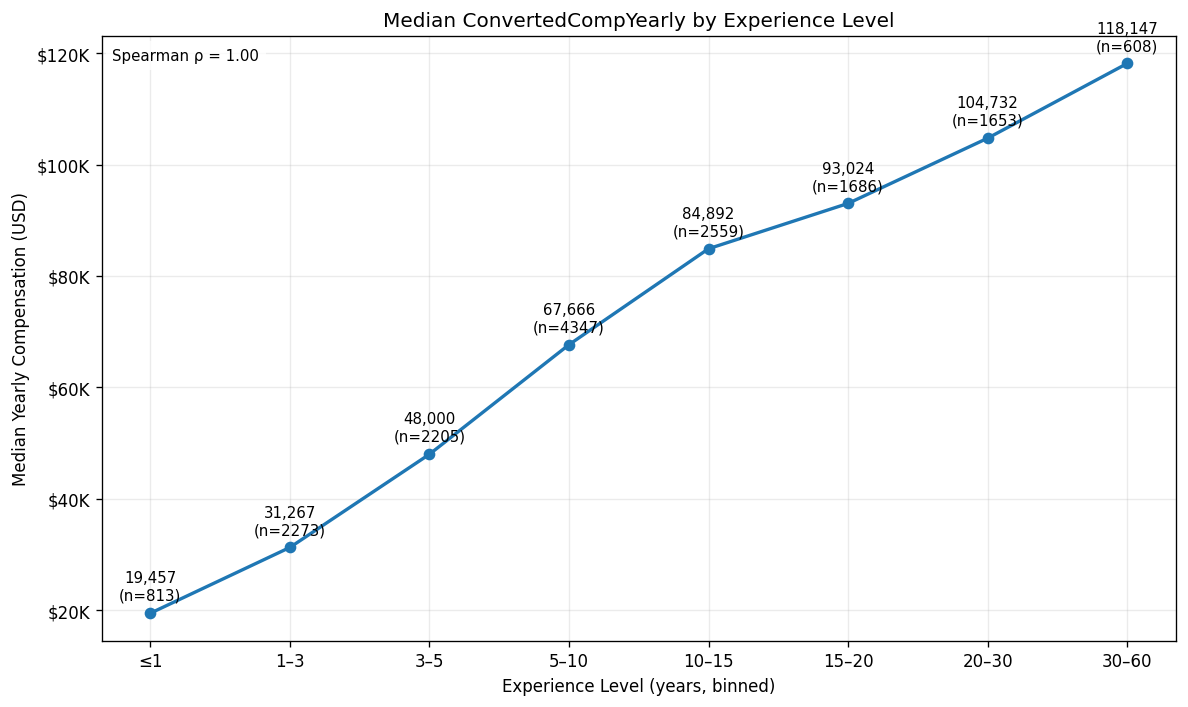

In [12]:
## Write your code here
# Line Chart — Median ConvertedCompYearly over Experience Level

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# ---------- helpers ----------
def find_col(cands):
    for c in cands:
        if c in df.columns:
            return c
    return None

def years_to_numeric(val):
    """Parse YearsCodePro/YearsCode/WorkExp into a float number of years."""
    if pd.isna(val):
        return np.nan
    if isinstance(val, (int, float)):
        return float(val)
    s = str(val).strip().lower()
    if "less than 1" in s:
        return 0.5
    if ("more than" in s and "50" in s) or s == "50+":
        return 50.0
    if s.endswith("+"):
        m = re.search(r'(\d+)', s)
        return float(m.group(1)) if m else np.nan
    m = re.search(r'-?\d+(?:\.\d+)?', s.replace(',', ''))
    return float(m.group(0)) if m else np.nan

def currency_fmt(v, _):
    if v >= 1e9: return f"${v/1e9:.1f}B"
    if v >= 1e6: return f"${v/1e6:.1f}M"
    if v >= 1e3: return f"${v/1e3:.0f}K"
    return f"${v:.0f}"

# ---------- pick columns ----------
comp_col = find_col(["ConvertedCompYearly", "CompTotal", "CompTotalUSD", "Salary"])
exp_col  = find_col(["WorkExp", "YearsCodePro", "YearsCode", "ProfessionalExperience", "CodingExperience"])

if comp_col is None or exp_col is None:
    raise ValueError("Need a compensation column (e.g., ConvertedCompYearly) and an experience column (WorkExp/YearsCodePro/YearsCode).")

# ---------- clean & prepare ----------
comp = pd.to_numeric(df[comp_col], errors="coerce")
yrs  = df[exp_col].map(years_to_numeric)

work = pd.DataFrame({"Comp": comp, "Years": yrs}).dropna()
work = work[(work["Comp"] > 0) & (work["Years"].between(0, 60))]

# Bin experience into readable “levels”
bins   = [-0.01, 1, 3, 5, 10, 15, 20, 30, 60]
labels = ["≤1", "1–3", "3–5", "5–10", "10–15", "15–20", "20–30", "30–60"]
work["ExpBin"] = pd.cut(work["Years"], bins=bins, labels=labels, right=True, include_lowest=True)

agg = (work.groupby("ExpBin", observed=True)
            .agg(median_comp=("Comp", "median"),
                 n=("Comp", "size"))
            .reset_index()
            .dropna(subset=["median_comp"]))

# ---------- plot ----------
fig, ax = plt.subplots(figsize=(10, 6), dpi=120)
x = np.arange(len(agg))
y = agg["median_comp"].values

ax.plot(x, y, marker="o", linewidth=2)

# annotate median and sample size
for i, (val, count) in enumerate(zip(y, agg["n"])):
    ax.annotate(f"{val:,.0f}\n(n={count})", (x[i], val),
                xytext=(0, 8), textcoords="offset points", ha="center", fontsize=9)

ax.set_xticks(x)
ax.set_xticklabels(agg["ExpBin"])
ax.set_xlabel("Experience Level (years, binned)")
ax.set_ylabel("Median Yearly Compensation (USD)")
ax.set_title("Median ConvertedCompYearly by Experience Level")
ax.yaxis.set_major_formatter(FuncFormatter(currency_fmt))
ax.grid(True, alpha=0.25)

# Optional: show monotonic trend strength (Spearman across bins)
bin_mid = np.array([0.5, 2, 4, 7.5, 12.5, 17.5, 25, 45])
mid_map = dict(zip(labels, bin_mid))
rho = pd.Series(agg["ExpBin"]).map(mid_map).corr(agg["median_comp"], method="spearman")
ax.text(0.01, 0.98, f"Spearman ρ = {rho:.2f}", transform=ax.transAxes,
        ha="left", va="top", fontsize=9,
        bbox=dict(facecolor="white", edgecolor="none", alpha=0.8))

plt.tight_layout()
plt.show()


##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


c:\Users\liyana_bh\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]


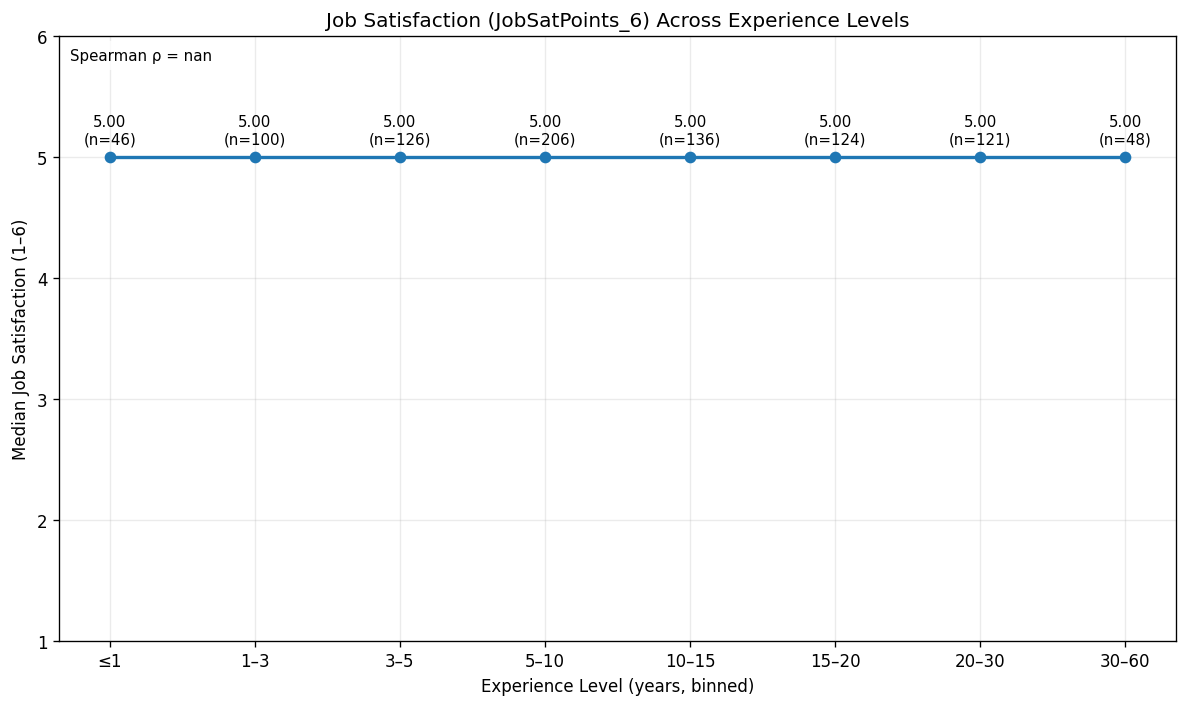

In [13]:
## Write your code here
# %%
# Line Chart — Job Satisfaction (JobSatPoints_6) across Experience Levels

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------- helpers --------
def find_col(cands):
    for c in cands:
        if c in df.columns:
            return c
    return None

def years_to_numeric(val):
    """Parse YearsCodePro/YearsCode/WorkExp style strings to a float."""
    if pd.isna(val): 
        return np.nan
    if isinstance(val, (int, float)):
        return float(val)
    s = str(val).strip().lower()
    if "less than 1" in s: 
        return 0.5
    if ("more than" in s and "50" in s) or s.endswith("+"):
        m = re.search(r'(\d+)', s);  return float(m.group(1)) if m else 50.0
    m = re.search(r'-?\d+(?:\.\d+)?', s.replace(',', ''))
    return float(m.group(0)) if m else np.nan

# -------- pick columns --------
sat_col = find_col(["JobSatPoints_6"])  # preferred for this task
if sat_col is None:
    raise ValueError("Column 'JobSatPoints_6' not found in your DataFrame.")

exp_col = find_col(["WorkExp", "YearsCodePro", "YearsCode", "ProfessionalExperience", "CodingExperience"])
if exp_col is None:
    raise ValueError("No experience column found (try WorkExp / YearsCodePro / YearsCode).")

# -------- clean & prepare --------
sat  = pd.to_numeric(df[sat_col], errors="coerce")
yrs  = df[exp_col].map(years_to_numeric)

work = pd.DataFrame({"Sat": sat, "Years": yrs}).dropna()
work = work[(work["Sat"].between(1, 6)) & (work["Years"].between(0, 60))]

# Experience bins (edit if you want finer/coarser buckets)
bins   = [-0.01, 1, 3, 5, 10, 15, 20, 30, 60]
labels = ["≤1", "1–3", "3–5", "5–10", "10–15", "15–20", "20–30", "30–60"]
work["ExpBin"] = pd.cut(work["Years"], bins=bins, labels=labels, right=True, include_lowest=True)

# Aggregate: median satisfaction per bin (robust) + counts
agg = (work.groupby("ExpBin", observed=True)
            .agg(median_sat=("Sat", "median"),
                 n=("Sat", "size"))
            .reset_index()
            .dropna(subset=["median_sat"]))

# -------- plot --------
fig, ax = plt.subplots(figsize=(10, 6), dpi=120)
x = np.arange(len(agg))
y = agg["median_sat"].values

ax.plot(x, y, marker="o", linewidth=2)

# annotate each point with median and sample size
for i, (val, count) in enumerate(zip(y, agg["n"])):
    ax.annotate(f"{val:.2f}\n(n={count})", (x[i], val),
                xytext=(0, 8), textcoords="offset points",
                ha="center", fontsize=9)

ax.set_xticks(x)
ax.set_xticklabels(agg["ExpBin"])
ax.set_xlabel("Experience Level (years, binned)")
ax.set_ylabel("Median Job Satisfaction (1–6)")
ax.set_title("Job Satisfaction (JobSatPoints_6) Across Experience Levels")
ax.set_yticks(np.arange(1, 7, 1))
ax.set_ylim(1, 6)
ax.grid(True, alpha=0.25)

# Optional: monotonic trend strength (Spearman across bins)
bin_mid = np.array([0.5, 2, 4, 7.5, 12.5, 17.5, 25, 45])
mid_map = dict(zip(labels, bin_mid))
rho = pd.Series(agg["ExpBin"]).map(mid_map).corr(agg["median_sat"], method="spearman")
ax.text(0.01, 0.98, f"Spearman ρ = {rho:.2f}", transform=ax.transAxes,
        ha="left", va="top", fontsize=9,
        bbox=dict(facecolor="white", edgecolor="none", alpha=0.8))

plt.tight_layout()
plt.show()

#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


Review — Line Charts: Compensation & Job Satisfaction
--What you did
-Parsed Age and created age groups to plot median ConvertedCompYearly across groups.
-Focused on ages 25–45 with two approaches:
--Fixed 5-year bins (25–29, 30–34, 35–39, 40–45) — revealed NaNs where the survey had no data for a bin.
--Used the survey’s own broader bands (25–34, 35–44) — produced complete medians and a cleaner trend line.
-Binned experience (from YearsCodePro/WorkExp) and plotted:
--Median compensation vs. experience (rises with experience; use log/annotated y to handle skew).
--Median JobSatPoints_6 vs. experience — medians were all ~5, showing a ceiling effect.

-Key takeaways
--Compensation generally increases with age and experience, with visible step-ups from the mid-20s to mid-40s.
--Job satisfaction is consistently high (median ≈ 5) across experience levels in this dataset; medians alone can mask subtle differences.
--Empty or missing points in line charts often come from bins with zero valid rows (e.g., no respondents in a narrow age band after cleaning).

-Quality checks you applied
--Removed non-positive comp and coerced numerics.
--Labeled points with sample sizes (n) to judge reliability.
--Addressed NaNs by rebinning to bands that match the survey.
--Explained why Spearman ρ can be NaN when the y-series is constant.

-Suggestions to strengthen insights (optional)
--For satisfaction trends, also plot means with 95% CI or % with high satisfaction (≥5) instead of medians only.
--Slice by country or employment type to see heterogeneous trends.
--Keep log scale for compensation and always annotate n per point.
--Consider 7- or 10-year age bins if your dataset is sparse.

-What to submit
--Line chart: Median compensation by age group (clearly labeled, with n).
--Line chart: Median compensation for ages 25–45 (use survey bands to avoid NaNs).
--Line chart: Compensation vs. experience (log y, annotated).
--Line chart: Job satisfaction vs. experience (note ceiling effect; optionally include mean±CI or high-sat %).
--A short paragraph interpreting each figure (two–three sentences each), echoing the points above.

### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
